In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

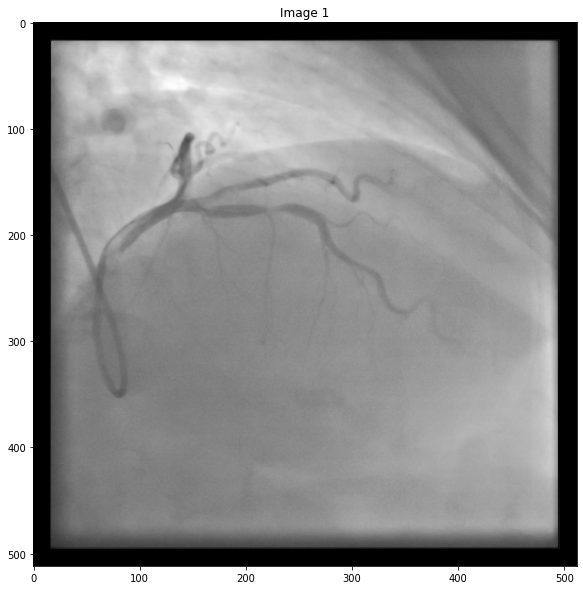

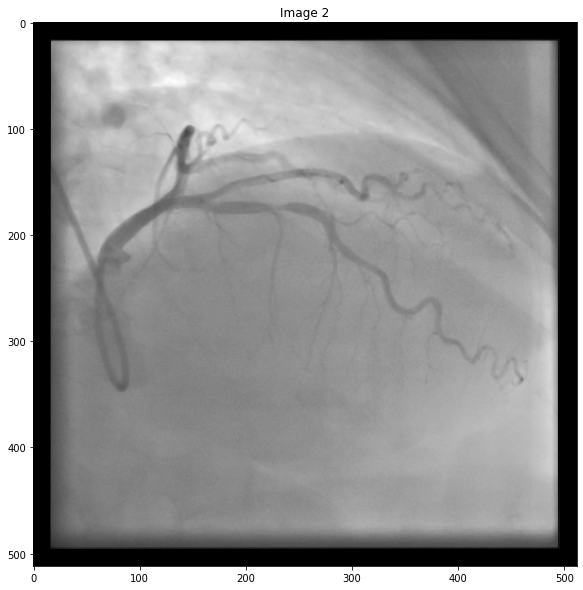

In [4]:
# Import the 2 images from gdrive
img1= cv2.imread('./dataset/14_002_5_0021.bmp')
img2 = cv2.imread('./dataset/14_002_5_0031.bmp')

# img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# print(img1_rgb.shape)

# show the images for reference
plt.figure(figsize=(20,10))
plt.imshow(img1)
plt.title('Image 1')
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(img2)
plt.title('Image 2')
plt.show()

(512, 512, 3)


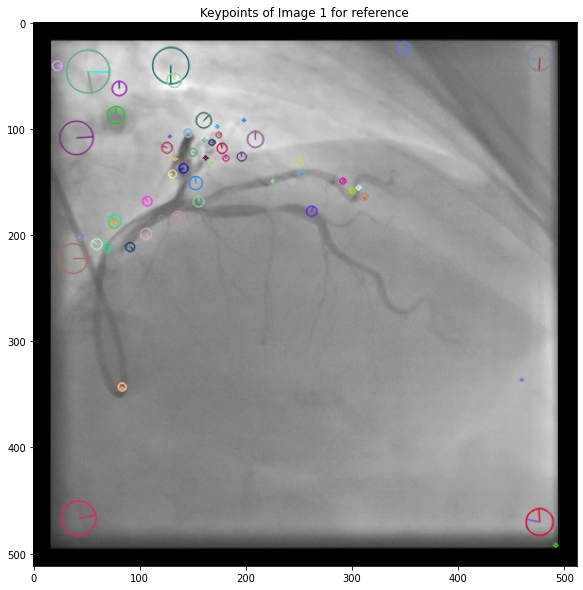

In [5]:
sift = cv2.SIFT_create()
kp = sift.detect(img2,None)

keypoints=cv2.drawKeypoints(img1,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img1)

print(keypoints.shape)
plt.figure(figsize=(20,10))
plt.imshow(keypoints)
plt.title('Keypoints of Image 1 for reference')
plt.show()

In [6]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
len(keypoints_1), len(keypoints_2)

(48, 72)

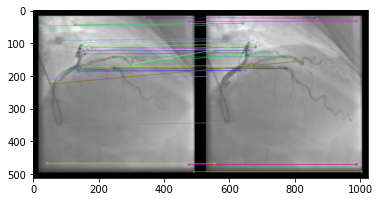

(<matplotlib.image.AxesImage at 0x22e898ee508>, None)

In [7]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1, descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [8]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

In [9]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (25, 25),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 20, 0.8))

In [12]:
# import os

# old_frame = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# new_frame = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# prev_kp, prev_des = sift.detectAndCompute(old_frame,None)
# bf = cv2.BFMatcher()
# with os.scandir("test") as entries:
#     for entry in entries:
#         new_frame = cv2.imread(os.path.join("dataset",entry.name))
#         new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
#         next_kp, next_des = sift.detectAndCompute(new_frame,None)
#         matches = bf.knnMatch(prev_des, next_des, k=2)
#         # matches = bf.match(prev_des, next_des)
#         # matches = sorted(matches, key = lambda x:x.distance)

#         # Apply ratio test
#         good = []
#         for m,n in matches:
#             if m.distance < 0.9*n.distance:
#                 good.append([m])
#         plt.imshow(img3),plt.show()
#         prev_kp = next_kp
#         prev_des = next_des
#         old_frame = new_frame


[[[19. 19.]]]


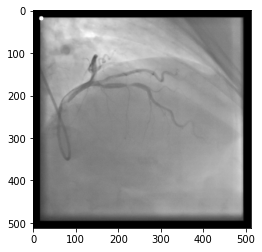

[[[17. 17.]]

 [[24. 17.]]

 [[19. 26.]]]


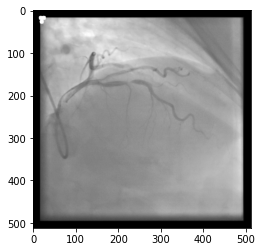

[[[16. 16.]]

 [[27. 16.]]

 [[16. 23.]]]


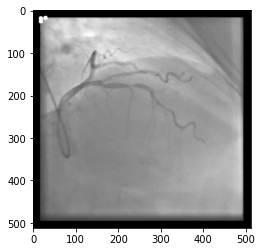

[[[24. 16.]]

 [[16. 17.]]

 [[16. 28.]]

 [[31. 16.]]]


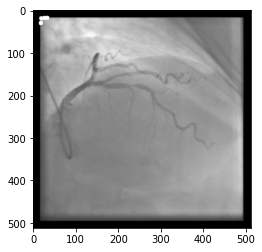

[[[17. 24.]]

 [[17. 17.]]

 [[16. 32.]]

 [[35. 16.]]]


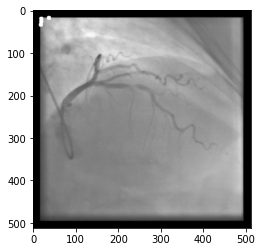

[[[17. 18.]]

 [[35. 16.]]

 [[16. 36.]]

 [[42. 16.]]]


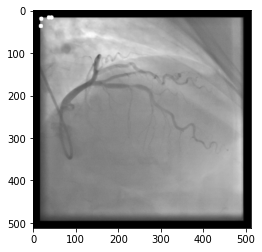

[[[17. 18.]]

 [[35. 15.]]

 [[45. 15.]]

 [[16. 39.]]

 [[16. 32.]]

 [[17. 25.]]]


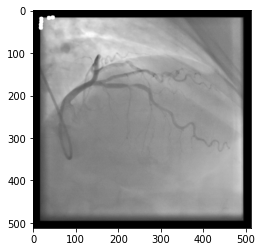

[[[17. 18.]]

 [[48. 15.]]

 [[16. 43.]]

 [[35. 16.]]

 [[41. 12.]]]


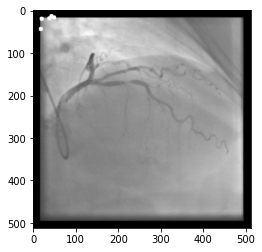

[[[18. 18.]]

 [[41. 11.]]

 [[16. 46.]]

 [[51. 15.]]

 [[16. 39.]]]


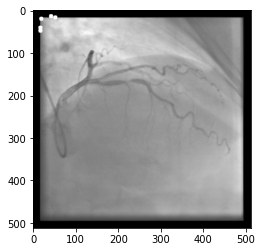

[[[48. 13.]]

 [[17. 18.]]

 [[40. 12.]]

 [[15. 50.]]

 [[15. 39.]]

 [[57. 15.]]]


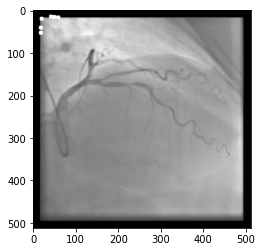

[[[18. 18.]]

 [[16. 48.]]

 [[40. 13.]]

 [[61. 14.]]

 [[16. 55.]]

 [[16. 39.]]]


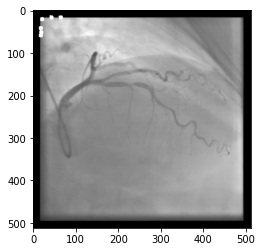

[[[19. 19.]]

 [[17. 48.]]

 [[63. 14.]]

 [[41. 15.]]

 [[16. 61.]]

 [[16. 40.]]

 [[70. 15.]]

 [[48. 15.]]]


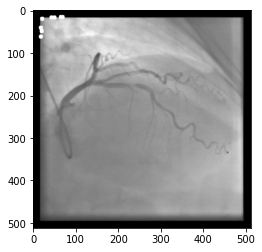

[[[19. 18.]]

 [[16. 55.]]

 [[63. 14.]]

 [[71. 14.]]

 [[52. 15.]]

 [[41. 15.]]

 [[16. 64.]]

 [[16. 39.]]]


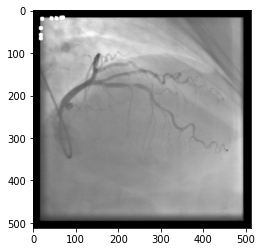

[[[61. 16.]]

 [[49. 17.]]

 [[19. 18.]]

 [[72. 14.]]

 [[16. 68.]]

 [[16. 56.]]

 [[16. 44.]]

 [[41. 17.]]

 [[16. 37.]]]


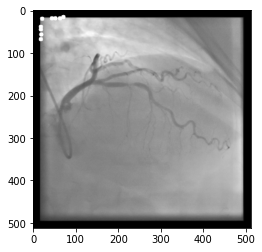

[[[16. 63.]]

 [[19. 18.]]

 [[58. 17.]]

 [[17. 52.]]

 [[73. 14.]]

 [[16. 70.]]

 [[16. 37.]]

 [[66. 14.]]

 [[42. 17.]]]


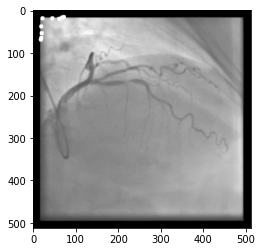

[[[18. 59.]]

 [[74. 14.]]

 [[20. 17.]]

 [[16. 71.]]

 [[17. 36.]]

 [[63. 15.]]

 [[47. 16.]]

 [[19. 46.]]

 [[27. 17.]]

 [[40. 17.]]]


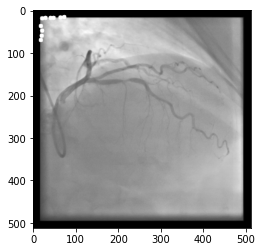

[[[34. 16.]]

 [[19. 17.]]

 [[17. 44.]]

 [[17. 64.]]

 [[75. 14.]]

 [[62. 14.]]

 [[19. 54.]]

 [[16. 72.]]

 [[16. 35.]]

 [[50. 15.]]]


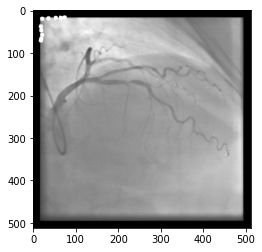

[[[58. 16.]]

 [[19. 18.]]

 [[18. 54.]]

 [[76. 14.]]

 [[16. 73.]]

 [[16. 36.]]

 [[51. 15.]]

 [[28. 19.]]

 [[38. 16.]]

 [[17. 62.]]]


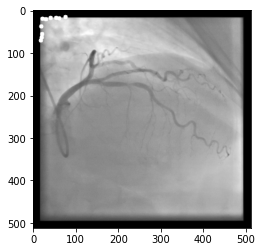

[[[48. 16.]]

 [[34. 17.]]

 [[78. 14.]]

 [[68. 15.]]

 [[20. 18.]]

 [[16. 73.]]

 [[17. 40.]]

 [[19. 54.]]

 [[19. 31.]]]


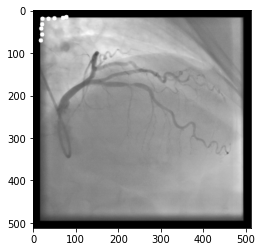

[[[80. 14.]]

 [[20. 18.]]

 [[43. 18.]]

 [[29. 19.]]

 [[16. 73.]]

 [[18. 63.]]

 [[68. 15.]]

 [[18. 50.]]

 [[18. 37.]]

 [[20. 26.]]

 [[52. 16.]]]


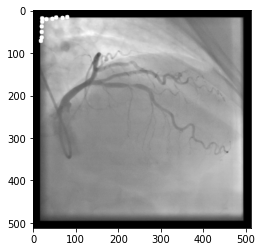

[[[75. 14.]]

 [[19. 17.]]

 [[82. 14.]]

 [[18. 58.]]

 [[19. 45.]]

 [[49. 15.]]

 [[62. 16.]]

 [[16. 74.]]

 [[27. 17.]]

 [[19. 31.]]

 [[38. 19.]]]


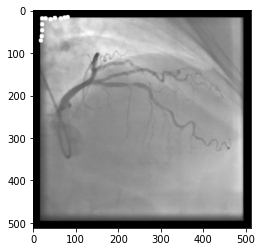

[[[19. 17.]]

 [[17. 65.]]

 [[83. 14.]]

 [[58. 16.]]

 [[45. 17.]]

 [[16. 73.]]

 [[19. 54.]]

 [[36. 18.]]

 [[69. 15.]]

 [[19. 26.]]

 [[19. 40.]]]


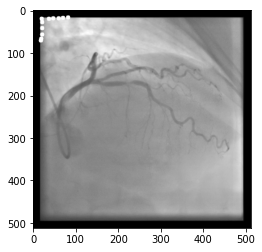

[[[75. 15.]]

 [[18. 18.]]

 [[54. 17.]]

 [[64. 16.]]

 [[84. 14.]]

 [[16. 73.]]

 [[41. 17.]]

 [[18. 61.]]

 [[19. 35.]]

 [[19. 50.]]]


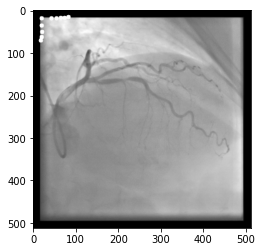

[[[18. 17.]]

 [[49. 17.]]

 [[59. 16.]]

 [[85. 14.]]

 [[19. 57.]]

 [[16. 73.]]

 [[78. 14.]]

 [[41. 16.]]

 [[19. 44.]]

 [[18. 34.]]

 [[27. 19.]]]


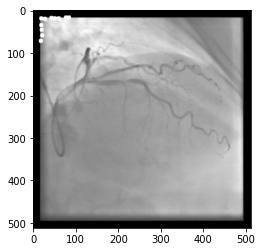

[[[17. 17.]]

 [[17. 65.]]

 [[18. 41.]]

 [[86. 14.]]

 [[75. 14.]]

 [[16. 74.]]

 [[19. 53.]]

 [[41. 15.]]

 [[17. 33.]]

 [[62. 16.]]

 [[24. 17.]]]


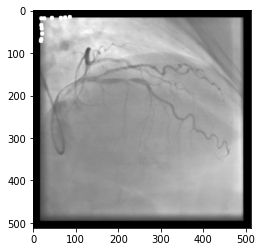

[[[81. 14.]]

 [[17. 17.]]

 [[69. 15.]]

 [[88. 14.]]

 [[19. 61.]]

 [[16. 74.]]

 [[19. 49.]]

 [[46. 15.]]

 [[19. 27.]]

 [[60. 16.]]

 [[28. 16.]]

 [[39. 16.]]]


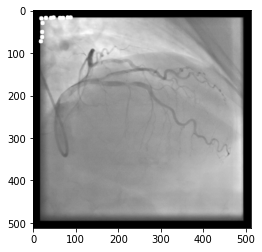

[[[76. 15.]]

 [[25. 16.]]

 [[35. 16.]]

 [[17. 17.]]

 [[17. 67.]]

 [[56. 16.]]

 [[90. 14.]]

 [[20. 57.]]

 [[16. 75.]]

 [[18. 26.]]]


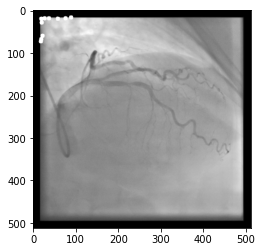

In [13]:
import os

old_frame = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
new_frame = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

with os.scandir("test") as entries:
    for entry in entries:
        new_frame = cv2.imread(os.path.join("dataset",entry.name))
        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
        # Create some random colors
        color = (255, 255, 0)
        mask = np.zeros_like(old_frame)
        p0 = cv2.goodFeaturesToTrack(old_frame, mask = None, **feature_params)
        type(p0)
        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_frame, new_frame, p0, None, **lk_params)
        # Select good points
        if p1 is not None:
            good_new = p1[st==1]
            good_old = p0[st==1]
        # draw the tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color, 2)
            new_frame = cv2.circle(new_frame, (int(a), int(b)), 5, color, -1)
        img = cv2.add(new_frame, mask)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        plt.imshow(img),plt.show()
        old_frame = new_frame